## 확률론적 선형 회귀모형

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정이 없어도 최적의 가중치를 계산할 수 있었다. 그러나 계산한 가중치가 어느 정도의 신뢰도를 가지는지 확인할 수 있는 방법이 없다.

예를 들어 보스턴 집값의 선형 회귀모형에서 OLS로 계산한 범죄율에 대한 가중치는 약  −0.1080 이었다. 만약 이 값이 정확한 값이라면 집값은 범죄율에 반비례한다는 결론을 내릴 수 있다. 하지만  −0.1080 은 표본에서 계산된 추정치일 뿐이며 추정 오차가 있을 수 있다. 만약 추정 오차의 크기가  0.0001  수준이라면 실제 가중치는  −0.1080±0.0001  즉,  −0.1081∼−0.1079  정도이고 집값이 범죄율에 반비례한다는 결론은 바뀌지 않을 것이다. 하지만 만약 추정 오차의 크기가  0.2  수준이라면 실제 가중치는  −0.3081∼0.0920  정도의 범위가 된다. 다시 말해 진짜 가중치는 0이 될 수도 있고 양수가 될 수 있다. 만약 가중치가 0이라면 범죄율과 집값은 아무런 상관 관계가 없다는 결론이 나온다. 만약 가중치가 양수이면 집값은 범죄율에 정비례한다는 결론이 나올 수도 있다. 즉 가중치의 오차 범위 혹은 신뢰 구간을 계산할 수 없다면 OLS 결과로부터 실질적인 결론을 이끌어내기 어렵다.

### 부트스트래핑

부트스트래핑(bootstrapping)은 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과는 어느 정도 영향을 받는지를 알기 위한 방법이다.

OLS로 구한 가중치의 추정값은 표본 데이터에 따라 달라진다. 만약 여러가지 다른 표본 데이터 집합이 있다면 이 데이터들을 넣어보면서 가중치가 어느 정도 달라지는지에 대한 감을 얻을 수 있을 것이다. 그러나 현실적으로는 추가적인 데이터를 얻기 어렵기 때문에 부트스트래핑 방법에서는 기존의 데이터를 재표본화(re-sampling)하여 여러가지 다양한 표본 데이터 집합을 만드는 방법을 사용한다. 재표본화는 기존의  N 개의 데이터에서 다시  N 개의 데이터를 선택하되 중복 선택도 가능하게 한다(unordered resampling with replacement).

직접 부트스트래핑을 실시해 보자. 다음과 같은 선형 회귀 모형을 따르는 100개의 가상 데이터를 생성한다. 모형에 사용된 모수는 상수항이  w0=0 , 기울기가  w1=42.3855 이다.

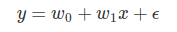

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550486)

이 표본 데이터를 기반으로 회귀분석을 실시한다.

In [2]:
import pandas as pd 
import statsmodels.api as sm

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [7]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

추정된 가중치값은 params 속성에 저장되어 있다. 상수항의 추정치가  w^0=−1.628364 , 기울기의 추정치가  w^1=42.853356 로 실제 모수와 다르다는 것을 알 수 있다.

다음으로 이 데이터를 재표본화하여 다른 데이터 집합을 만들고 이 데이터를 기반으로 다시 회귀분석을 한다. 여기에서는 이러한 회귀분석을 1,000번 반복한다. 그 결과로써 1,000개의 다른 가중치 추정값이 나오게 된다.

In [9]:
import numpy as np

In [10]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

CPU times: user 1.27 s, sys: 0 ns, total: 1.27 s
Wall time: 1.29 s


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uce58' [U+ce58], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubd84' [U+bd84], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud3ec' [U+d3ec], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd94' [U+cd94], 

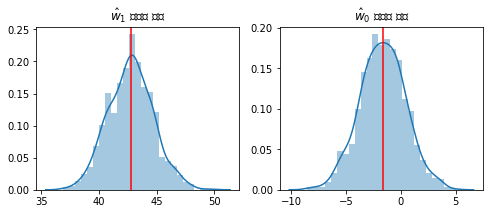

In [12]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

추정치 분포의 평균과 분산은 다음과 같다. 기울기의 추정치 분포는 평균이  42.92 , 표준편차가  1.92 이다. 대부분의 데이터가  42.92±3.84  ( x¯±2s ) 사이에 있다. 따라서 오차가 큰 경우에도 0 혹은 음수가 될 가능성은 적다

In [13]:
params_w1.mean(), params_w1.std()

(42.756439316230434, 1.9423996356611637)

그런데 상수항의 추정치 분포는 평균이  −1.67 , 표준편차가  2.16 이다. 대부분의 데이터가  −1.67±4.32(−5.99∼2.65)  사이에 있기 때문에 0일 수도 있고 혹은 음수일 수도 있다.

In [14]:
params_w0.mean(), params_w0.std()

(-1.6611072941180087, 2.081855058154745)

이 결과를 statsmodels의 summary 메서드로 출력한 보고서와 비교해보면 추정치의 표준편차와 비슷한 값이 std err이라는 이름으로 표시되어 있고  x¯±2s 로 추정한 구간과 비슷한 값이 [0.025 0.975] 열 아래에 표시되어 있다. 예를 들어 상수항 추정치는 std err가 2.163 이고 [0.025 0.975]열 값이  −5.920∼2.663 이다.

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.21e-36
Time:                        14:15:18   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

### 확률론적 선형 회귀모형
- 확률론적 선형 회귀모형에서는 데이터가 확률 변수로부터 생성된 표본이라고 가정한다. 구체적인 가정은 다음과 같다.

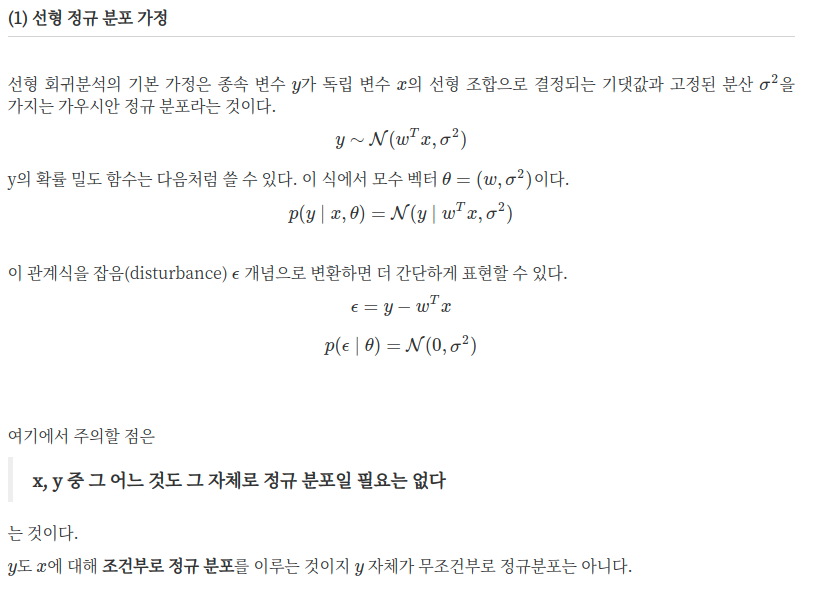

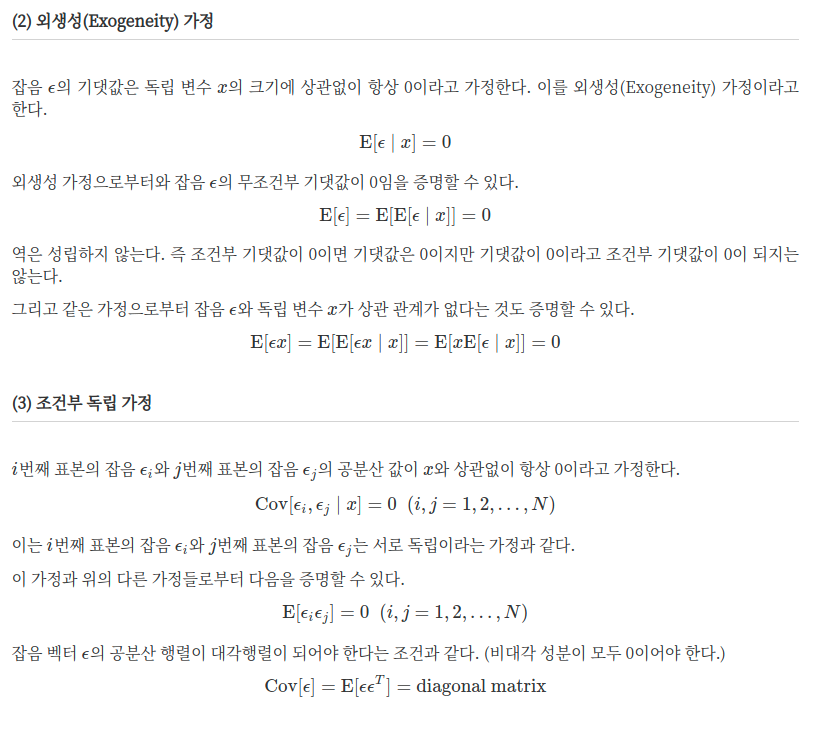

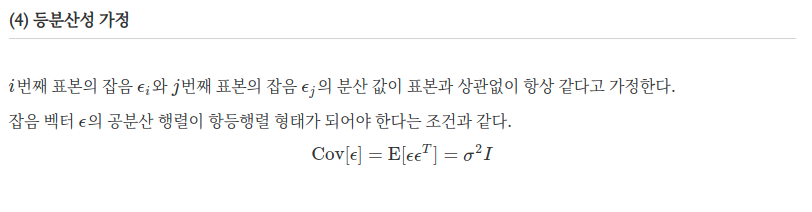

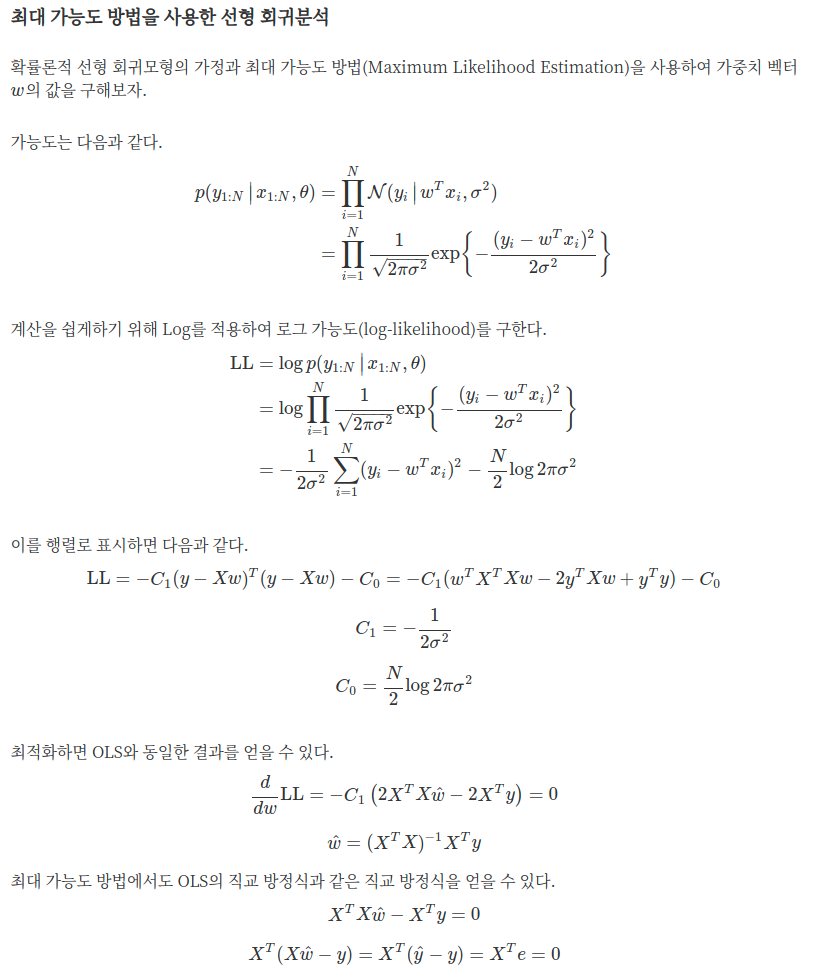

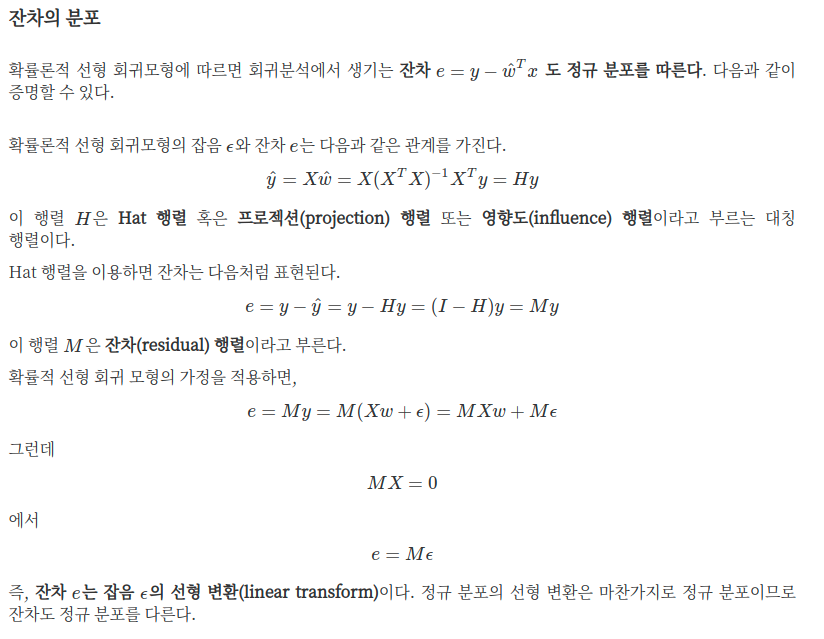

In [17]:
import scipy as sp

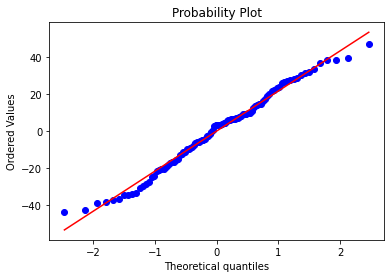

In [18]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

잔차의 정규성은 다음과 같이 정규성 검정을 통해 살펴볼 수도 있다.

In [20]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'],test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [21]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


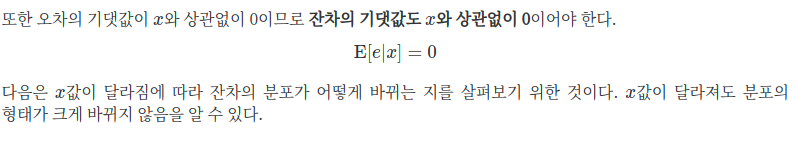

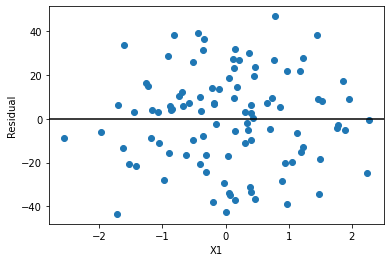

In [22]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

다음은  x 가  e 에 미치는 영향을 살피기 위해  0<x<1 인 구간과  1<x<2 인 구간으로 나누어  e  분포의 모양을 살펴본 것이다. 둘 다 기댓값이 0에 가깝고 분산의 크기가 비슷함을 알 수 있다.

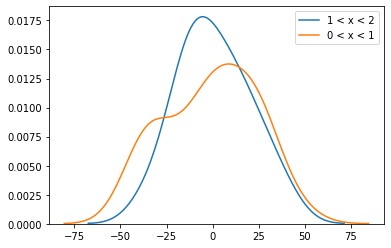

In [23]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

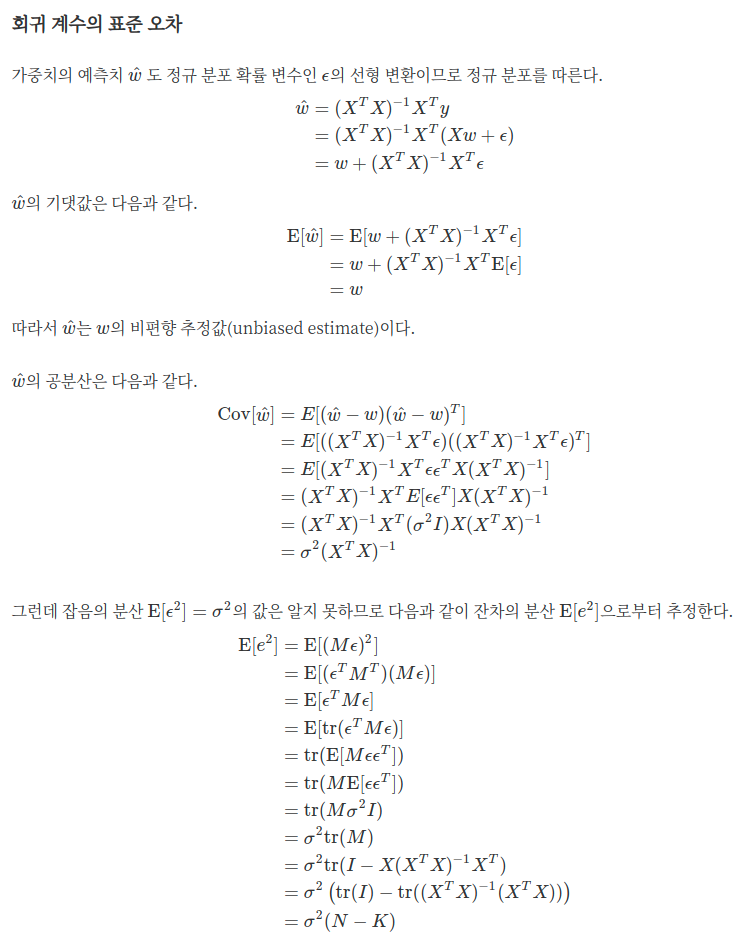

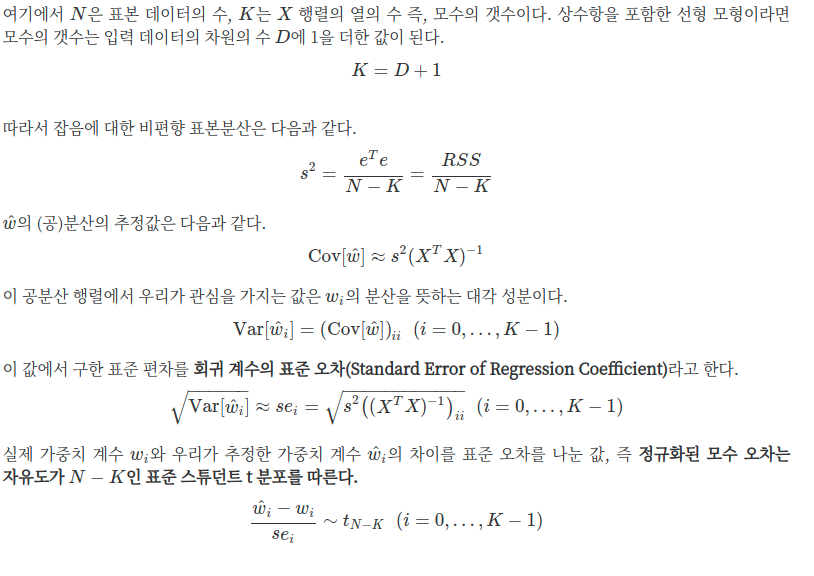

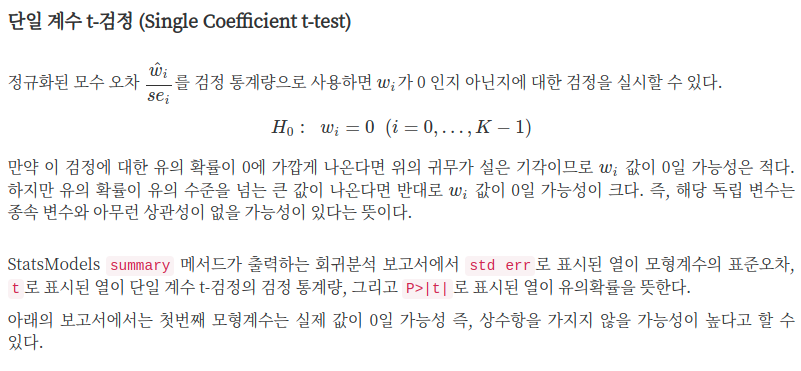

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.21e-36
Time:                        14:23:21   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

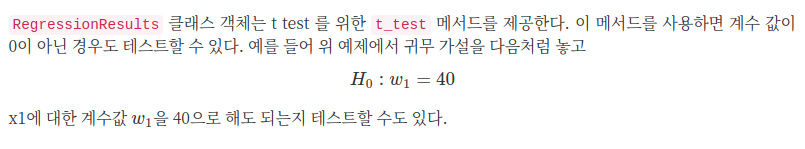

In [25]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


이 검정 결과에 따르면 x1에 대한 계수를 40으로 한다고 해도 문제가 없음을 알 수 있다.

이 방법은 두 독립변수의 계수값을 비교할 때도 쓸 수 있다. 범주형 독립변수의 범주값이 가지는 유의성을 판단하는데 유용하다. 예를 들어 월평균 기온을 나타내는 nottem 데이터에서 1월과 2월의 기온이 실질적으로 같은지를 알아볼 때도 사용할 수 있다.

In [26]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          2.96e-125
Time:                        14:25:00   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

다음 코드에서 보듯이 1월과 2월의 기온은 실질적으로 차이가 없다. 즉, 1월과 2월이라는 범주 값을 구분하는 실익이 존재하지 않는다.

In [28]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


2월과 3월의 경우에는 구분이 필요하다는 것을 알 수 있다.

In [29]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


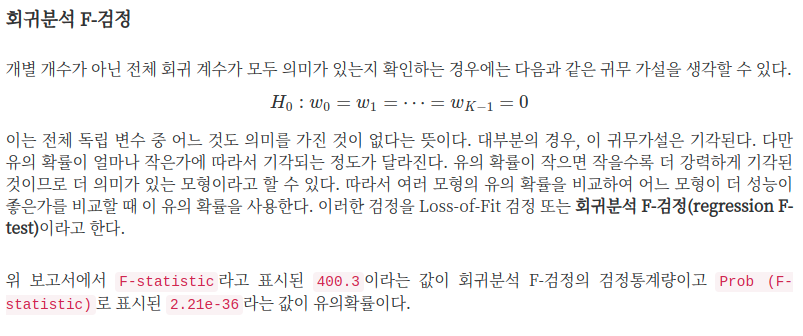